In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [122]:
df = pd.read_csv('2013_movies.csv')

In [65]:
df_g = df[df['Rating'] == 'G']
df_g

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 00:00


In [23]:
#Challenge 1: Plot domestic total gross over time.

df_problem1 = df.groupby('ReleaseDate', as_index=False).mean()

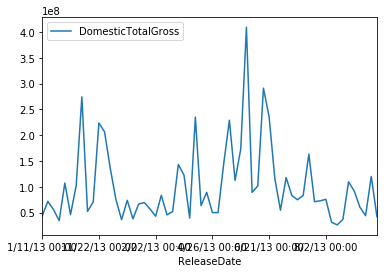

In [25]:
df_problem1.plot(x='ReleaseDate', y='DomesticTotalGross')

In [30]:
#Challenge 2: Plot runtime vs. domestic total gross.

df_problem2 = df.groupby('Runtime', as_index=False).mean()

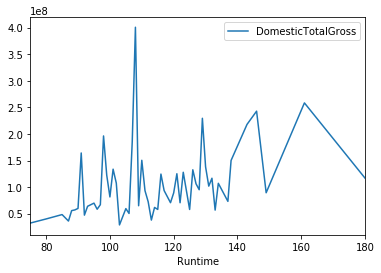

In [32]:
df_problem2.plot(x='Runtime', y='DomesticTotalGross')

In [50]:
#Challenge 3: Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

df_problem3 = df.groupby('Rating').mean()[['Runtime', 'DomesticTotalGross']]

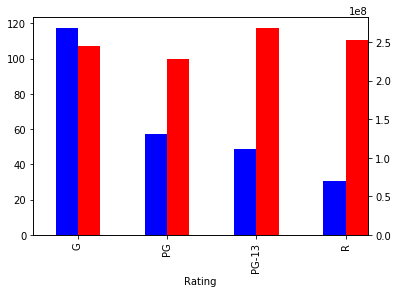

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df_problem3['Runtime'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)
df_problem3['DomesticTotalGross'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25)

ax.set_ylabel = ('Runtime')
ax2.set_ylabel = ('DomesticTotalGross')
plt.show()

In [75]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 00:00


In [82]:
chee = df.groupby('Rating')

In [86]:
df_problem4 = df[['Rating','ReleaseDate', 'DomesticTotalGross']]

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


Rating
G        AxesSubplot(0.125,0.125;0.775x0.755)
PG       AxesSubplot(0.125,0.125;0.775x0.755)
PG-13    AxesSubplot(0.125,0.125;0.775x0.755)
R        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

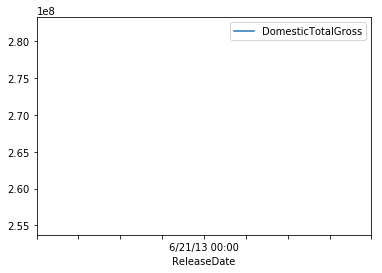

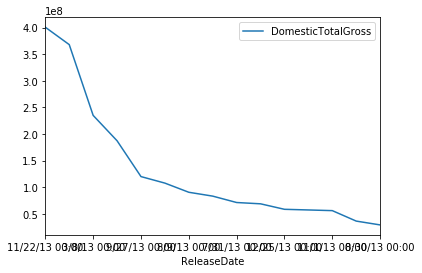

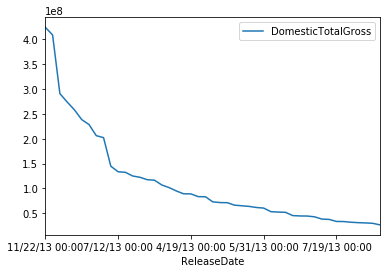

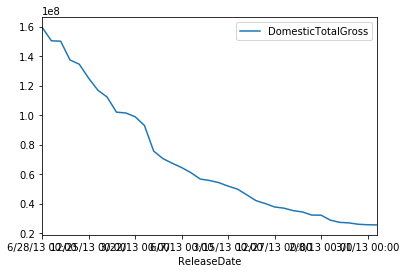

In [110]:
df_problem4.groupby('Rating').plot(x='ReleaseDate', y='DomesticTotalGross')

In [107]:
#Challenge 5: What director in your dataset has the highest gross per movie?
df_problem5 = df.groupby('Director', as_index=False).mean().sort_values(by='DomesticTotalGross', ascending=False).iloc[0:1]['Director']

df_problem5

27    Francis Lawrence
Name: Director, dtype: object

In [127]:
#Challenge 6: Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
def getMonth(x):
    
    if x[1] == '/':
        return x[0:1]
    else:
        return x[0:2]


df['Month'] = list(map(getMonth, df['ReleaseDate']))
df_problem6 = df.groupby('Month', as_index=False).mean()

In [114]:
plt.figure()
#ax = fig.add_subplot(111)
#ax2 = ax.twinx()

#df_problem6['Runtime'].plot(kind='bar', color='red', ax=ax, position=0, width=0.25)
df_problem6['DomesticTotalGross'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25)

ax.set_ylabel = ('Runtime')
ax2.set_ylabel = ('DomesticTotalGross')
plt.show()

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [128]:
df_problem6.head()

,Month,Budget,DomesticTotalGross,Runtime
0,1,31875000.0,4.954324e+07,94.600000
1,10,44000000.0,1.150270e+08,108.600000
2,11,70300000.0,1.379368e+08,110.700000
3,12,67300000.0,8.748339e+07,125.769231
4,2,46000000.0,6.738601e+07,103.857143
